# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
display(customers.head())
print(customers.isnull().sum())
print(customers.Channel.value_counts())
print(customers.Region.value_counts())
print(customers.describe())
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Deter

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [4]:
# Your observations here
# En las columnas vemos los gastos de los clientes para cada una de las categorías de los productos
# No vemos pérdida de datos.
# Si se ve una alta correlación entre Detergents_paper y Grocery.
# No hace falta convetir ninguna columna categórica.
# Aunque si que vemos que existen datos outliers, no vamos a prescindir de ellos para poder ver si se comple el
# principio de Pareto

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [5]:
# Your code here
customers = customers.drop(["Channel", "Region"], axis='columns')

In [6]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit(customers)
customers_scale = pd.DataFrame(scaler.transform(customers), columns= customers.columns)
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [8]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(customers_scale)
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [9]:
# Your code here:
customers.labels.value_counts()

0    233
5    103
7     40
4     36
2     21
1      5
6      1
3      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [10]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(customers_scale)

Count the values in `labels_DBSCAN`.

In [11]:
# Your code here
customers['labels_DBSCAN'] = dbscan.labels_
customers.labels_DBSCAN.value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

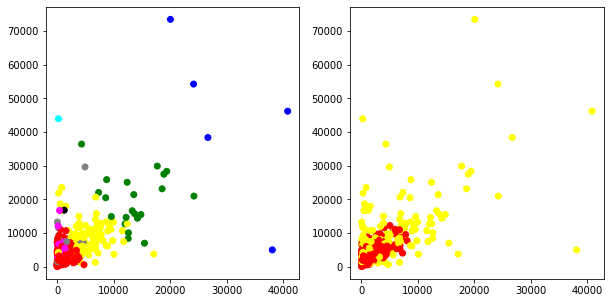

In [12]:
import matplotlib.pyplot as plt
c = {-1:"yellow", 0:"red", 1:"blue", 2:"green", 3:"cyan", 4:"magenta", 5:"yellow", 6:"black", 7:"grey"}
lab = [c[i] for i in customers.labels]
lab_dbscan = [c[i] for i in customers.labels_DBSCAN]

f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Detergents_Paper, customers.Milk, color=lab)
ax2.scatter(customers.Detergents_Paper, customers.Milk, color=lab_dbscan)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

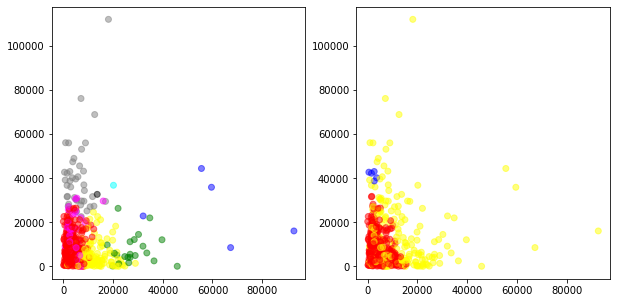

In [13]:
# Your code here:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab)
ax2.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab_dbscan)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

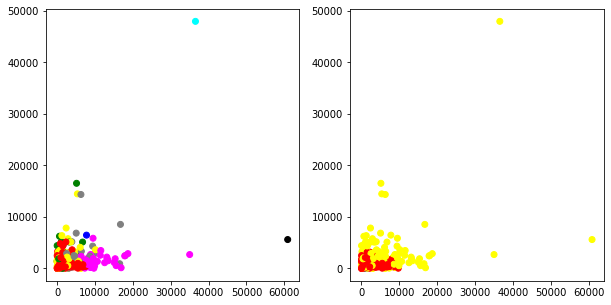

In [14]:
# Your code here:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Frozen, customers.Delicassen, color=lab)
ax2.scatter(customers.Frozen, customers.Delicassen, color=lab_dbscan)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [15]:
# Your code here:
labels_mean = customers.groupby("labels").mean()
dbscan_mean = customers.groupby("labels_DBSCAN").mean()
display(labels_mean)
dbscan_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,9224.334764,2588.214592,3365.896996,1895.952790,810.708155,919.669528,-0.111588
1,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,-1.000000
2,7792.952381,19566.714286,28166.952381,2041.619048,13552.619048,3164.952381,-1.000000
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
4,15728.361111,3984.055556,4018.361111,11371.861111,506.333333,1530.388889,-0.722222
5,5646.126214,8931.368932,13542.009709,1572.980583,5641.048544,1667.436893,-0.611650
6,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000,-1.000000
7,40546.450000,4875.200000,6053.925000,4625.800000,1092.975000,2406.500000,-0.650000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,3.977011
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,1.026820
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,7.000000


Which algorithm appears to perform better?

In [16]:
# Your observations here
# Con este número de clusters parecen más diferenciables los valores con DBSCAN, a pesar de que tienen medias
# casi solapadas.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

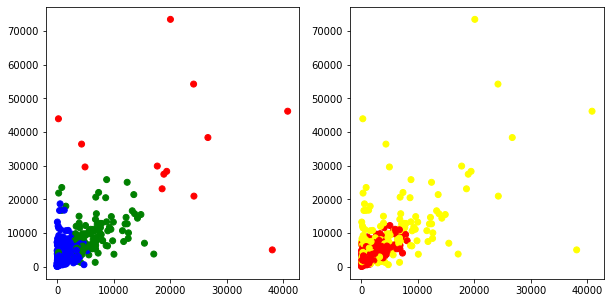

In [17]:
# Your code here
kmeans = KMeans(3).fit(customers_scale)
customers['labels'] = kmeans.labels_
c = {-1:"yellow", 0:"red", 1:"blue", 2:"green", 3:"cyan", 4:"magenta", 5:"yellow", 6:"black", 7:"grey"}
lab = [c[i] for i in customers.labels]
lab_dbscan = [c[i] for i in customers.labels_DBSCAN]
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Detergents_Paper, customers.Milk, color=lab)
ax2.scatter(customers.Detergents_Paper, customers.Milk, color=lab_dbscan)

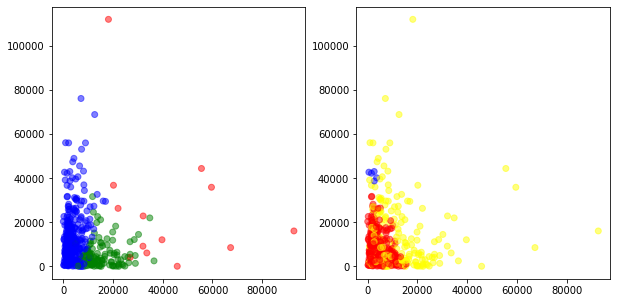

In [18]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab)
ax2.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab_dbscan)

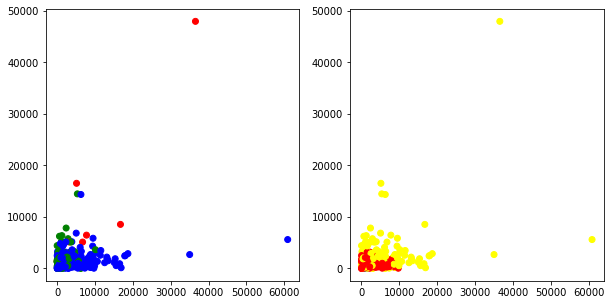

In [19]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Frozen, customers.Delicassen, color=lab)
ax2.scatter(customers.Frozen, customers.Delicassen, color=lab_dbscan)

In [20]:
labels_mean = customers.groupby("labels").mean()
dbscan_mean = customers.groupby("labels_DBSCAN").mean()
display(labels_mean)
dbscan_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000
1,13618.905660,3143.091195,3881.770440,3471.050314,854.930818,1192.135220,-0.257862
2,5635.770642,10034.577982,15765.623853,1457.587156,6768.009174,1737.614679,-0.678899


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,1.350575
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,1.134100
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000


In [21]:
# Your comment here
# Con 3 clustes va mejor Kmeans ya que vemos que las medias salen valores bastantes distintos y en el caso de dbscan
# para las columnas Frozen y Delicassen las medias casi se solapan y no podremos diferenciar los clusters.
# Parecen rangos más diferenciados los de dbscan.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [22]:
# Your code here
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_
customers.labels_DBSCAN.value_counts()

-1    363
 0     77
Name: labels_DBSCAN, dtype: int64

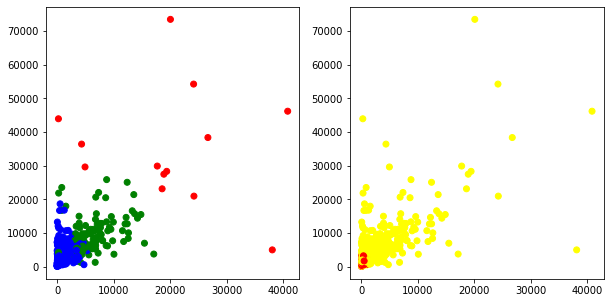

In [23]:
c = {-1:"yellow", 0:"red", 1:"blue", 2:"green", 3:"cyan", 4:"magenta", 5:"yellow", 6:"black", 7:"grey"}
lab = [c[i] for i in customers.labels]
lab_dbscan = [c[i] for i in customers.labels_DBSCAN]
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Detergents_Paper, customers.Milk, color=lab)
ax2.scatter(customers.Detergents_Paper, customers.Milk, color=lab_dbscan)

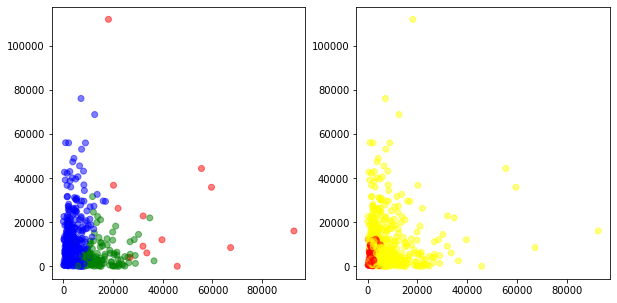

In [24]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab)
ax2.scatter(customers.Grocery, customers.Fresh, alpha=0.5, color=lab_dbscan)

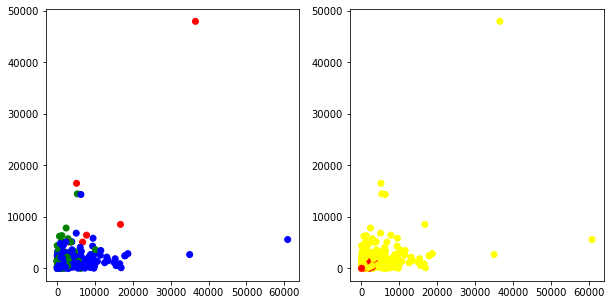

In [25]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.scatter(customers.Frozen, customers.Delicassen, color=lab)
ax2.scatter(customers.Frozen, customers.Delicassen, color=lab_dbscan)

In [26]:
labels_mean = customers.groupby("labels").mean()
dbscan_mean = customers.groupby("labels_DBSCAN").mean()
display(labels_mean)
dbscan_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000
1,13618.905660,3143.091195,3881.770440,3471.050314,854.930818,1192.135220,-0.757862
2,5635.770642,10034.577982,15765.623853,1457.587156,6768.009174,1737.614679,-1.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,13332.143251,6709.633609,9231.099174,3415.187328,3424.424242,1733.914601,1.264463
0,5721.597403,1490.389610,1917.831169,1453.727273,321.961039,539.376623,1.000000


In [27]:
# Your comment here
# Bajamos en número de cluster aumentando el número de samples y disminuyendo la distancia entre puntos
# del mismo cluster. hace que tengamos medias más difrenciadas pero se sigue viendo la categorización
# con los 3 clusters de KMeans